# Cats and Dogs Classifier - ConvNet


In [14]:
# Take image input.
import random
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from __future__ import print_function
% matplotlib inline
import os
# Place Image input in the the testing location, and run the testing code.

In [ ]:
import os

# Remove test data folder
# path_2_test = "/Users/HillOfFlame/TAVTech/Hackathon/cGANs_Sketch2Portrait/datasets/faces/test/"
# mo_dir = "/Users/HillOfFlame/TAVTech/Hackathon/cGANs_Sketch2Portrait/datasets/faces/"
# test = "test"
# print ("mo_dir:", os.listdir(mo_dir))
# files = os.listdir(mo_dir)
# if test in files:    
#     os.system("rm -rf " + path_2_test)
#     os.system("mkdir " + path_2_test)


# Remove the test_latest file
files = os.listdir("/Users/HillOfFlame/TAVTech/Hackathon/cGANs_Sketch2Portrait/results/faces_pix2pix/")
name_test_latest = "test_latest"
path_test_latest = os.path.join("/Users/HillOfFlame/TAVTech/Hackathon/cGANs_Sketch2Portrait/results/faces_pix2pix/", name_test_latest)

if name_test_latest in files:    
    os.system("rm -rf " + path_test_latest)

# Test the photo
os.system("python test.py --dataroot ./datasets/faces --name faces_pix2pix --model pix2pix --which_model_netG unet_256 --which_direction BtoA --dataset_mode aligned --norm batch --gpu_id -1")

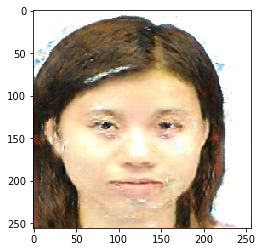

In [17]:
motherPath = "/Users/HillOfFlame/TAVTech/Hackathon/cGANs_Sketch2Portrait/results/faces_pix2pix/test_latest/images/"
files = os.listdir(motherPath)
imPath = os.path.join(motherPath, files[1])
image = Image.open(imPath)
# image = image.resize((200,250),Image.ANTIALIAS)
pix = np.array(image)
plt.imshow(pix.astype('uint8'))

In [ ]:
image2 = Image.open("/Users/HillOfFlame/TAVTech/Hackathon/cGANs_Sketch2Portrait/datasets/combine/B/real/Jack_Stone.jpg")
image2 = image2.resize((200,250),Image.ANTIALIAS)
pix2 = np.array(image2)
plt.imshow(pix2.astype('uint8'))

cv2.imwrite("/Users/HillOfFlame/TAVTech/Hackathon/cGANs_Sketch2Portrait/datasets/combine/B/real/Jack_Stone1.jpg", pix)

In [22]:


cv2.imwrite("/Users/HillOfFlame/TAVTech/Hackathon/cGANs_Sketch2Portrait/datasets/combine/A/real/Jack_Stone_stache3.jpg", pix2)



True

In [15]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
"""
OpenCV... written in C++
There is a python interface which reads images.
Reads them as GBR, not RGB

"""

'\nOpenCV... written in C++\nThere is a python interface which reads images.\nReads them as GBR, not RGB\n\n'

In [17]:
# Experimenting with a Photo.
image = Image.open("/Users/HillOfFlame/TAVTech/ArtificialIntelligence/deep-learning-keras-tensorflow/data/DogsVsCats/train/dog.12487.jpg")
image = image.resize((224,224),Image.ANTIALIAS)
pix = np.array(image)

In [18]:
print (pix.size) # numpy array
print (image.size) # image dimensions

150528
(224, 224)


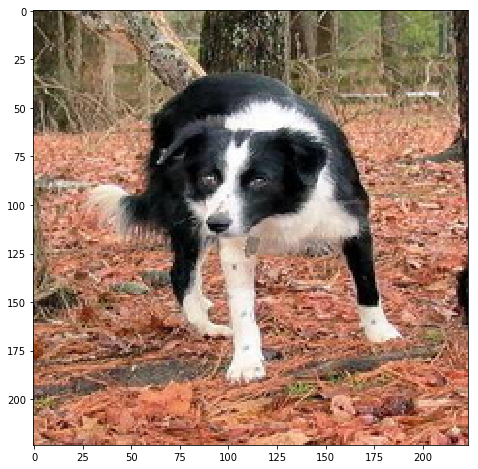

In [19]:
plt.imshow(pix.astype('uint8'))

In [20]:
# Uploading Training Sets, turning into numpy arrays.
dogSet = []
catSet = []
n_tr_set = 2000
dim = 224

for i in range(0, n_tr_set):
    image = Image.open("/Users/HillOfFlame/TAVTech/ArtificialIntelligence/deep-learning-keras-tensorflow/data/DogsVsCats/train/dog." + str(i) +".jpg")
    image = image.resize((dim,dim),Image.ANTIALIAS)
    
    ar = np.array(image)
    dogSet.append(ar)
    # print statement
    if i % 500 == 0:
        print ("Loaded: dogs", i)

for i in range(0, n_tr_set):
    image = Image.open("/Users/HillOfFlame/TAVTech/ArtificialIntelligence/deep-learning-keras-tensorflow/data/DogsVsCats/train/cat." + str(i) +".jpg")
    image = image.resize((dim,dim),Image.ANTIALIAS)
    ar = np.array(image)
    catSet.append(ar)
    # print statement
    if i % 500 == 0:
        print ("Loaded: cats", i)


Loaded: dogs 0
Loaded: dogs 500
Loaded: dogs 1000
Loaded: dogs 1500
Loaded: cats 0
Loaded: cats 500
Loaded: cats 1000
Loaded: cats 1500


In [21]:
# Creating Training Sets and Testing Sets

div = int(n_tr_set * 4 / 5)

num_training = 5000
mask = list(range(num_training))

# Initializing Training Data
d = dogSet[: div]
c = catSet[: div]
X_train = np.concatenate([c,d])
print (X_train.shape)
d = [1]*div 
c = [0]*div 
y_train = np.concatenate([c,d])


# Initializing Testing Data
d = dogSet[ div :]
c = catSet[div :]
X_test = np.concatenate([c,d])

d = [1]*len(d) 
c = [0]*len(c) 
y_test = np.concatenate([c,d])
print (X_test.shape)

(3200, 224, 224, 3)
(800, 224, 224, 3)


In [22]:
# Randomize the data
def randomList(a): 
    b = [] 
    for i in range(len(a)): 
        element = random.choice(a) 
        a.remove(element) 
        b.append(element) 
    return b


In [23]:
def randomize(xlst, ylst, rlst):
    X_rand = []
    y_rand = []
    for i in rlst:
        X_rand.append(xlst[i])
        y_rand.append(ylst[i])
    return np.asarray(X_rand), np.asarray(y_rand)

X_train, y_train = randomize(X_train, y_train, randomList(list(range(0, y_train.shape[0]))))
X_test, y_test = randomize(X_test, y_test, randomList(list(range(0, y_test.shape[0]))))

In [24]:
X_train, Y_train = np.asarray(X_train), np.asarray(Y_train)

# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

# X_train /= 255
# X_test /= 255

NameError: name 'Y_train' is not defined

In [ ]:
X_test, Y_test = np.asarray(X_test), np.asarray(Y_test)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_train[0][0][0])
# # Reshape the image data into rows
# X_train = np.reshape(X_train, (X_train.shape[0], -1))
# X_test = np.reshape(X_test, (X_test.shape[0], -1))
# print(X_train.shape, X_test.shape)

In [ ]:
from keras.utils import np_utils
nb_classes = 2
Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_train[0][0][0])

## Uploading VGG19

In [13]:
from keras import applications
from keras import Sequential
from keras.layers.core import Dense, Activation

model = applications.VGG16(weights='imagenet', include_top=True)

Using TensorFlow backend.
/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [ ]:
model.layers[-1].get_config()

In [ ]:
model.layers.pop()

In [ ]:
model.layers
model.layers[-1].get_config()

In [ ]:
top_model = Sequential()
top_model.add(Dense(10,input_shape=(4096,)))
top_model.add(Activation('softmax'))

In [ ]:
# CREATE AN "REAL" MODEL FROM VGG16
# BY COPYING ALL THE LAYERS OF VGG16
new_model = Sequential()
for l in model.layers:
    new_model.add(l)
    
# CONCATENATE THE TWO MODELS
new_model.add(top_model)

In [ ]:
for layer in new_model.layers[:-1]:
    layer.trainable = False
    

In [ ]:
print (new_model.layers[-2].get_config())
print()
print (new_model.layers[-1].get_config())

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

In [ ]:
new_model.compile(loss='categorical_crossentropy',
          optimizer='sgd',
          metrics=['accuracy'])

new_model.fit(X_train, Y_train, batch_size=32, 
          nb_epoch=2,verbose=1,
          validation_data=(X_test, Y_test))

In [ ]:
from keras import applications
from keras import Sequential
from keras.layers.core import Dense, Activation

modelVGG = applications.VGG16(weights='imagenet', include_top=True)

modelVGG.fit(X_train, Y_train, batch_size=32, 
          nb_epoch=2,verbose=1,
          validation_data=(X_test, Y_test))

In [ ]:
# %load deep_learning_models/imagenet_utils.py
import numpy as np
import json

from keras.utils.data_utils import get_file
from keras import backend as K

CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'


def preprocess_input(x, dim_ordering='default'):
    if dim_ordering == 'default':
        dim_ordering = K.image_dim_ordering()
    assert dim_ordering in {'tf', 'th'}

    if dim_ordering == 'th':
        x[:, 0, :, :] -= 103.939
        x[:, 1, :, :] -= 116.779
        x[:, 2, :, :] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, ::-1, :, :]
    else:
        x[:, :, :, 0] -= 103.939
        x[:, :, :, 1] -= 116.779
        x[:, :, :, 2] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, :, :, ::-1]
    return x


def decode_predictions(preds):
    global CLASS_INDEX
    assert len(preds.shape) == 2 and preds.shape[1] == 1000
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    indices = np.argmax(preds, axis=-1)
    results = []
    for i in indices:
        results.append(CLASS_INDEX[str(i)])
    return results

In [ ]:
IMAGENET_FOLDER = 'imgs/imagenet'  #in the repo


In [ ]:
# %load deep_learning_models/vgg16.py
'''VGG16 model for Keras.

# Reference:

- [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)

'''
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten, Dense, Input
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing import image
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras import backend as K

TH_WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_th_dim_ordering_th_kernels.h5'
TF_WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
TH_WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_th_dim_ordering_th_kernels_notop.h5'
TF_WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'


def VGG16(include_top=True, weights='imagenet',
          input_tensor=None):
    '''Instantiate the VGG16 architecture,
    optionally loading weights pre-trained
    on ImageNet. Note that when using TensorFlow,
    for best performance you should set
    `image_dim_ordering="tf"` in your Keras config
    at ~/.keras/keras.json.

    The model and the weights are compatible with both
    TensorFlow and Theano. The dimension ordering
    convention used by the model is the one
    specified in your Keras config file.

    # Arguments
        include_top: whether to include the 3 fully-connected
            layers at the top of the network.
        weights: one of `None` (random initialization)
            or "imagenet" (pre-training on ImageNet).
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.

    # Returns
        A Keras model instance.
    '''
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')
    # Determine proper input shape
    if K.image_dim_ordering() == 'th':
        if include_top:
            input_shape = (3, 224, 224)
        else:
            input_shape = (3, None, None)
    else:
        if include_top:
            input_shape = (224, 224, 3)
        else:
            input_shape = (None, None, 3)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor)
        else:
            img_input = input_tensor
    # Block 1
    x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv1')(img_input)
    x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Convolution2D(128, 3, 3, activation='relu', border_mode='same', name='block2_conv1')(x)
    x = Convolution2D(128, 3, 3, activation='relu', border_mode='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Convolution2D(256, 3, 3, activation='relu', border_mode='same', name='block3_conv1')(x)
    x = Convolution2D(256, 3, 3, activation='relu', border_mode='same', name='block3_conv2')(x)
    x = Convolution2D(256, 3, 3, activation='relu', border_mode='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block4_conv1')(x)
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block4_conv2')(x)
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block5_conv1')(x)
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block5_conv2')(x)
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    if include_top:
        # Classification block
        x = Flatten(name='flatten')(x)
        x = Dense(4096, activation='relu', name='fc1')(x)
        x = Dense(4096, activation='relu', name='fc2')(x)
        x = Dense(1000, activation='softmax', name='predictions')(x)

    # Create model
    model = Model(img_input, x)

    # load weights
    if weights == 'imagenet':
        print('K.image_dim_ordering:', K.image_dim_ordering())
        if K.image_dim_ordering() == 'th':
            if include_top:
                weights_path = get_file('vgg16_weights_th_dim_ordering_th_kernels.h5',
                                        TH_WEIGHTS_PATH,
                                        cache_subdir='models')
            else:
                weights_path = get_file('vgg16_weights_th_dim_ordering_th_kernels_notop.h5',
                                        TH_WEIGHTS_PATH_NO_TOP,
                                        cache_subdir='models')
            model.load_weights(weights_path)
            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image dimension ordering convention '
                              '(`image_dim_ordering="th"`). '
                              'For best performance, set '
                              '`image_dim_ordering="tf"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')
                convert_all_kernels_in_model(model)
        else:
            if include_top:
                weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels.h5',
                                        TF_WEIGHTS_PATH,
                                        cache_subdir='models')
            else:
                weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                        TF_WEIGHTS_PATH_NO_TOP,
                                        cache_subdir='models')
            model.load_weights(weights_path)
            if K.backend() == 'theano':
                convert_all_kernels_in_model(model)
    return model

In [ ]:
import os

model = VGG16(include_top=True, weights='imagenet')

img_path = os.path.join(IMAGENET_FOLDER, 'strawberry_1157.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

In [ ]:
img_path = os.path.join(IMAGENET_FOLDER, 'strawberry_1157.jpeg')
img_path = "/Users/HillOfFlame/TAVTech/ArtificialIntelligence/deep-learning-keras-tensorflow/data/DogsVsCats/train/dog.12499.jpg"

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

## Building the CNN Model

In [ ]:
# exercise - implement convnet on Cifar10

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

from keras import backend as K
print (K.backend())
print (K.image_dim_ordering())

In [ ]:
print(X_train[0][0][0])

In [ ]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
nb_classes = 2
print (X_train.shape)


# # Quest: What does reshaping do? Maybe it is unneccesary for this dataset? Let's check.
# X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,3)
# X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,3)

# X_train = X_train.reshape(1, X_train.shape[0], img_rows, img_cols)
# X_test = X_test.reshape(1, X_test.shape[0], img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train[0][0][0])

In [ ]:
print (y_train[1111])

In [ ]:
Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)
print (Y_train[1])

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

In [ ]:
#Initializing the values for the convolution neural network
nb_epoch = 5
batch_size = 64
# number of convolutional filters to use
nb_filters = 128
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

In [ ]:


model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid', 
                        input_shape=(img_rows, img_cols, 3)))

model.add(Activation('relu'))

model.add(Flatten()) # Must flatten before you use fully connected (dense). So unroll.

model.add(Dense(nb_classes)) # Last layer to be ten neurons, one for each class.

model.add(Activation('softmax'))



In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
X_train_enh, X_val, Y_train_enh, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

In [ ]:
fBestModel = 'best_model.h5' 
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)
model.fit(X_train_enh, Y_train_enh, validation_data = (X_val, Y_val), nb_epoch=10, 
          batch_size=128, verbose=True, validation_split=0.15, 
          callbacks=[best_model, early_stop])

In [ ]:
score, accuracy = model.evaluate(X_test, Y_test, verbose=0) # Evaluate will return the accuracy.
print('Test score:', score)
print('Test accuracy:', accuracy)

In [ ]:
# Importing VGG
    

In [ ]:
# %load deep_learning_models/imagenet_utils.py
import numpy as np
import json

from keras.utils.data_utils import get_file
from keras import backend as K

CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'


def preprocess_input(x, dim_ordering='default'):
    if dim_ordering == 'default':
        dim_ordering = K.image_dim_ordering()
    assert dim_ordering in {'tf', 'th'}

    if dim_ordering == 'th':
        x[:, 0, :, :] -= 103.939
        x[:, 1, :, :] -= 116.779
        x[:, 2, :, :] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, ::-1, :, :]
    else:
        x[:, :, :, 0] -= 103.939
        x[:, :, :, 1] -= 116.779
        x[:, :, :, 2] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, :, :, ::-1]
    return x


def decode_predictions(preds):
    global CLASS_INDEX
    assert len(preds.shape) == 2 and preds.shape[1] == 1000
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    indices = np.argmax(preds, axis=-1)
    results = []
    for i in indices:
        results.append(CLASS_INDEX[str(i)])
    return results


In [ ]:
IMAGENET_FOLDER = 'imgs/imagenet'  #in the repo

In [ ]:
# %load deep_learning_models/vgg16.py
'''VGG16 model for Keras.

# Reference:

- [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)

'''
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten, Dense, Input
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing import image
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras import backend as K

TH_WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_th_dim_ordering_th_kernels.h5'
TF_WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
TH_WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_th_dim_ordering_th_kernels_notop.h5'
TF_WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'


def VGG16(include_top=True, weights='imagenet',
          input_tensor=None):
    '''Instantiate the VGG16 architecture,
    optionally loading weights pre-trained
    on ImageNet. Note that when using TensorFlow,
    for best performance you should set
    `image_dim_ordering="tf"` in your Keras config
    at ~/.keras/keras.json.

    The model and the weights are compatible with both
    TensorFlow and Theano. The dimension ordering
    convention used by the model is the one
    specified in your Keras config file.

    # Arguments
        include_top: whether to include the 3 fully-connected
            layers at the top of the network.
        weights: one of `None` (random initialization)
            or "imagenet" (pre-training on ImageNet).
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.

    # Returns
        A Keras model instance.
    '''
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')
    # Determine proper input shape
    if K.image_dim_ordering() == 'th':
        if include_top:
            input_shape = (3, 224, 224)
        else:
            input_shape = (3, None, None)
    else:
        if include_top:
            input_shape = (224, 224, 3)
        else:
            input_shape = (None, None, 3)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor)
        else:
            img_input = input_tensor
    # Block 1
    x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv1')(img_input)
    x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Convolution2D(128, 3, 3, activation='relu', border_mode='same', name='block2_conv1')(x)
    x = Convolution2D(128, 3, 3, activation='relu', border_mode='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Convolution2D(256, 3, 3, activation='relu', border_mode='same', name='block3_conv1')(x)
    x = Convolution2D(256, 3, 3, activation='relu', border_mode='same', name='block3_conv2')(x)
    x = Convolution2D(256, 3, 3, activation='relu', border_mode='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block4_conv1')(x)
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block4_conv2')(x)
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block5_conv1')(x)
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block5_conv2')(x)
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    if include_top:
        # Classification block
        x = Flatten(name='flatten')(x)
        x = Dense(4096, activation='relu', name='fc1')(x)
        x = Dense(4096, activation='relu', name='fc2')(x)
        x = Dense(1000, activation='softmax', name='predictions')(x)

    # Create model
    model = Model(img_input, x)

    # load weights
    if weights == 'imagenet':
        print('K.image_dim_ordering:', K.image_dim_ordering())
        if K.image_dim_ordering() == 'th':
            if include_top:
                weights_path = get_file('vgg16_weights_th_dim_ordering_th_kernels.h5',
                                        TH_WEIGHTS_PATH,
                                        cache_subdir='models')
            else:
                weights_path = get_file('vgg16_weights_th_dim_ordering_th_kernels_notop.h5',
                                        TH_WEIGHTS_PATH_NO_TOP,
                                        cache_subdir='models')
            model.load_weights(weights_path)
            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image dimension ordering convention '
                              '(`image_dim_ordering="th"`). '
                              'For best performance, set '
                              '`image_dim_ordering="tf"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')
                convert_all_kernels_in_model(model)
        else:
            if include_top:
                weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels.h5',
                                        TF_WEIGHTS_PATH,
                                        cache_subdir='models')
            else:
                weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                        TF_WEIGHTS_PATH_NO_TOP,
                                        cache_subdir='models')
            model.load_weights(weights_path)
            if K.backend() == 'theano':
                convert_all_kernels_in_model(model)
    return model

In [ ]:
import os

model = VGG16(include_top=True, weights='imagenet')

img_path = os.path.join(IMAGENET_FOLDER, 'strawberry_1157.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

In [ ]:
img_path = os.path.join(IMAGENET_FOLDER, 'strawberry_1157.jpeg')
img_path = "/Users/HillOfFlame/TAVTech/ArtificialIntelligence/deep-learning-keras-tensorflow/data/DogsVsCats/train/dog.12499.jpg"

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))